In [16]:
import gymnasium as gym  # Gymnasium kütüphanesini içe aktarır (RL ortamları için)

from stable_baselines3 import PPO  # PPO algoritmasını içe aktarır
from stable_baselines3.common.env_util import make_vec_env  # Çoklu ortam oluşturucu fonksiyonu
import numpy as np  # NumPy kütüphanesini içe aktarır (sayısal işlemler için)

In [ ]:
# "CartPole-v1" ortamından 4 adet paralel ortam oluşturur:
#Paralel ortamlar (vektörleştirilmiş ortamlar), aynı anda birden fazla ortamda ajanı eğitmeye yarar.
#Bunun avantajları şunlardır:
#Daha hızlı eğitim: Ajan, her adımda birden fazla ortamdan veri toplar ve bu sayede daha fazla deneyim kazanır.
#Daha çeşitli deneyim: Farklı ortamlarda aynı anda çalışmak, ajanı daha çeşitli durumlarla karşılaştırır ve genelleme yeteneğini artırır.
#Verimli donanım kullanımı: Özellikle çok çekirdekli işlemcilerde, paralel ortamlar donanımı daha verimli kullanır.
#Kısacası, paralel ortamlar eğitim sürecini hızlandırır ve ajanı daha iyi hale getirir.
parallel_env = make_vec_env("CartPole-v1", n_envs=4)

# PPO algoritması ile bir model oluşturur, çok katmanlı algılayıcı (MLP) politika kullanır
ppo_model = PPO("MlpPolicy", parallel_env, verbose=1)

# Modeli 25.000 adım boyunca eğitir
ppo_model.learn(total_timesteps=25000)

# Eğitilmiş modeli "ppo_cartpole" adıyla kaydeder
ppo_model.save("ppo_cartpole")

# Model nesnesini siler (bellekten kaldırır)
del ppo_model

# Kaydedilmiş modeli tekrar yükler
ppo_model = PPO.load("ppo_cartpole")


# Görselleştirme için tek bir ortam oluşturur, 'rgb_array' ile görüntü alınır
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Ortamı sıfırlar ve başlangıç gözlemini alır
observation = env.reset()

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | 22.7     |
| time/              |          |
|    fps             | 5836     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 35.6        |
|    ep_rew_mean          | 35.6        |
| time/                   |             |
|    fps                  | 2416        |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014607085 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.000207   |
|    learning

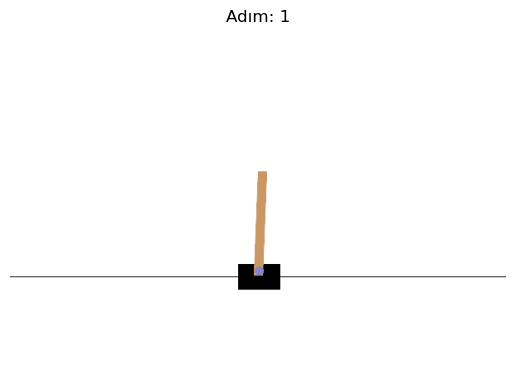

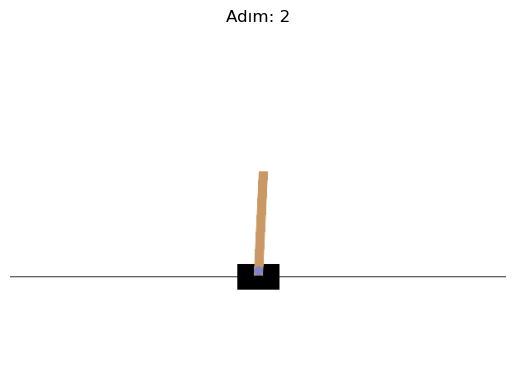

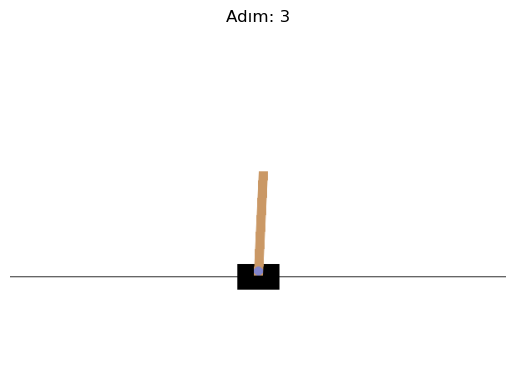

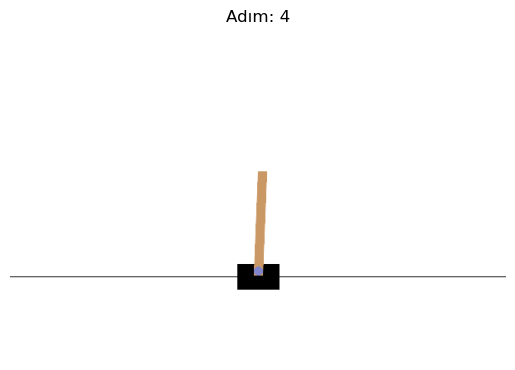

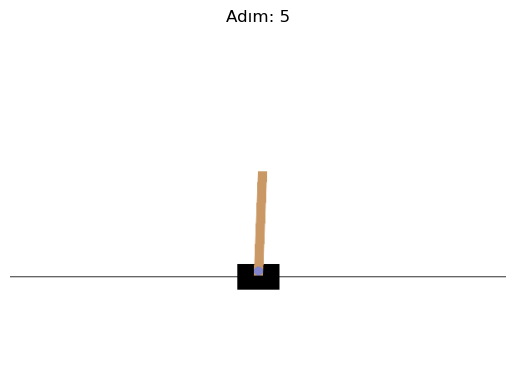

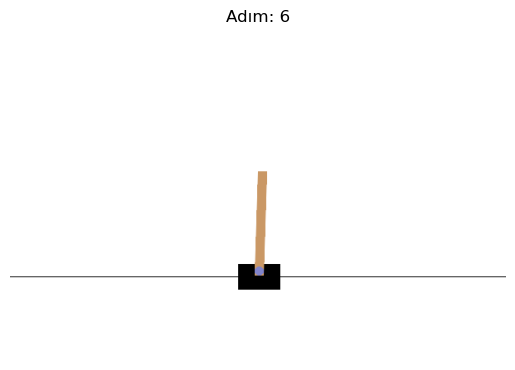

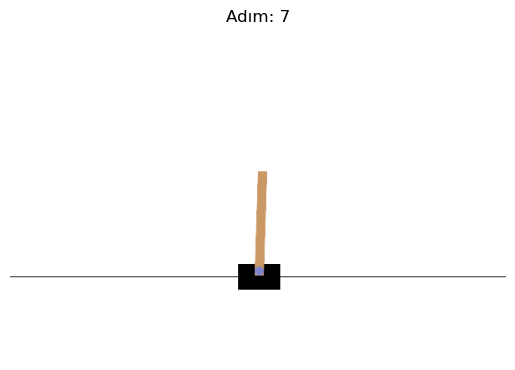

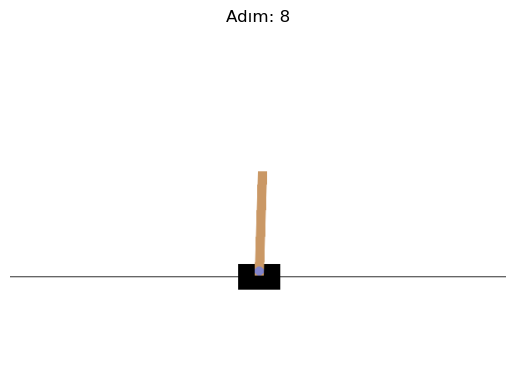

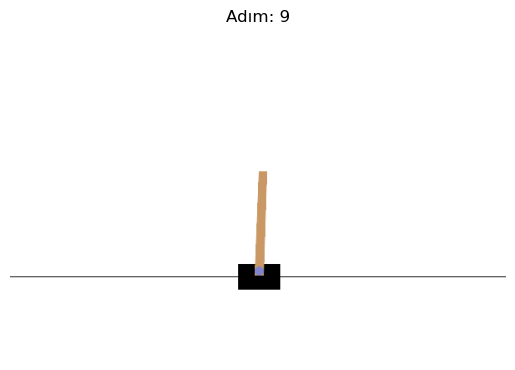

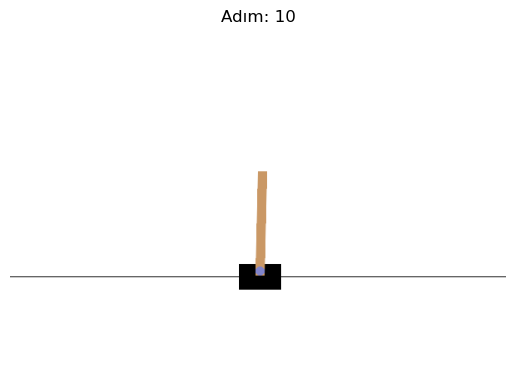

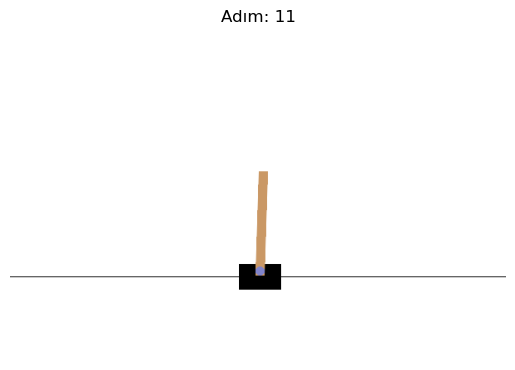

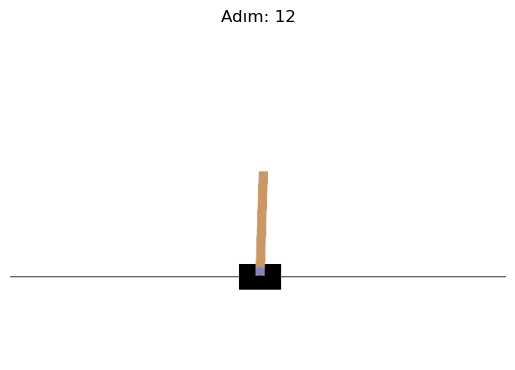

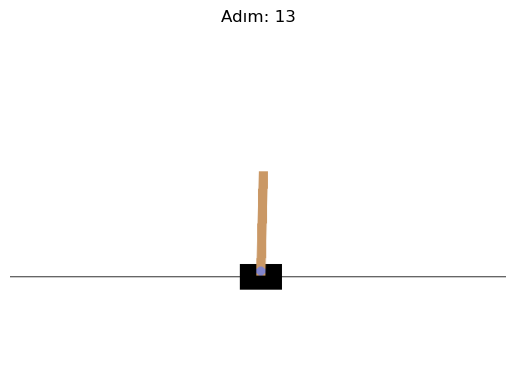

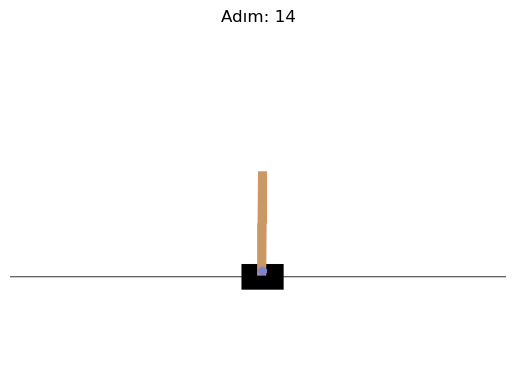

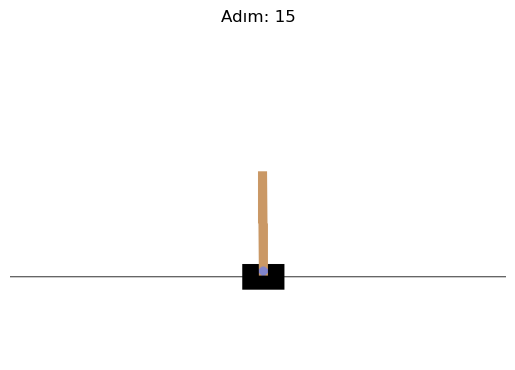

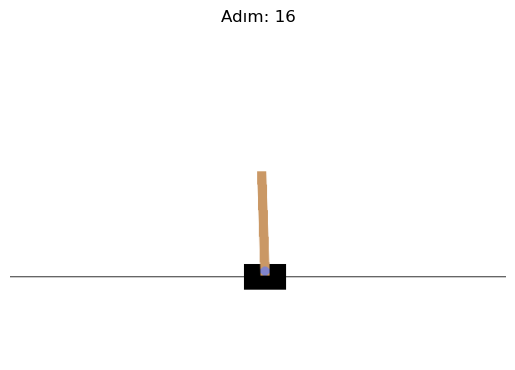

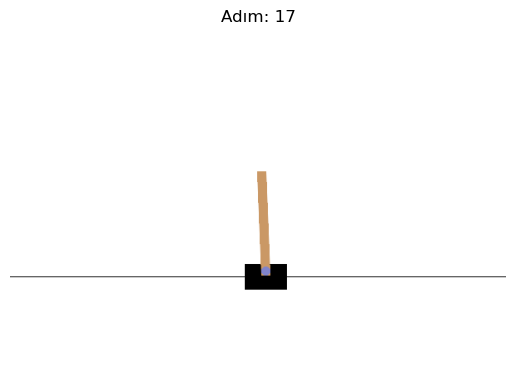

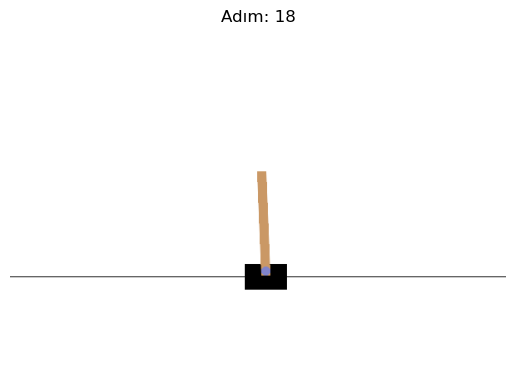

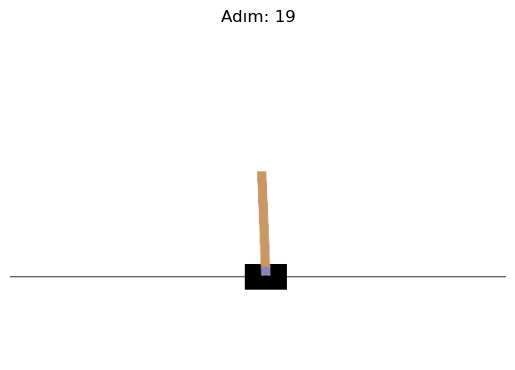

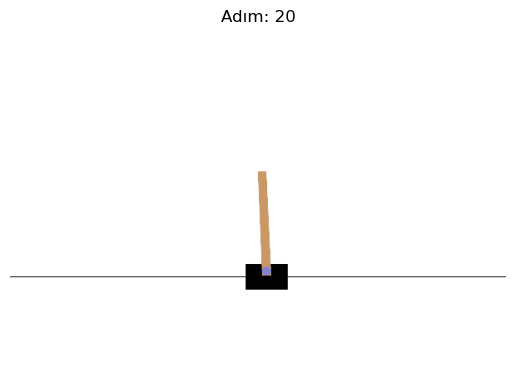

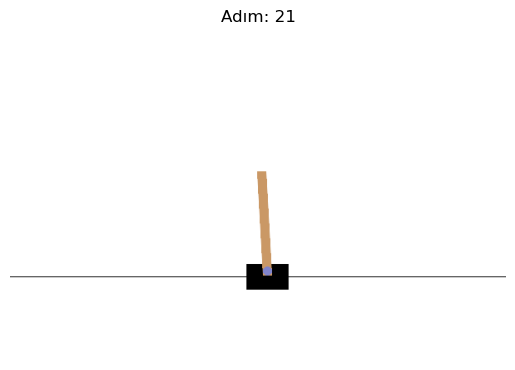

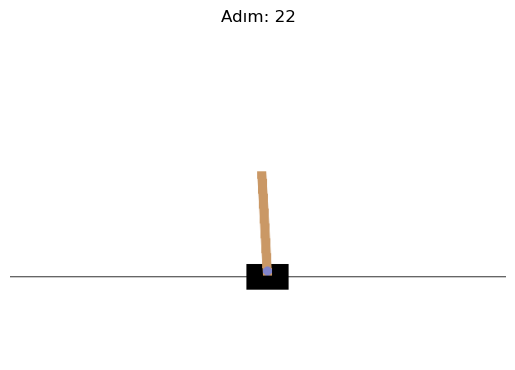

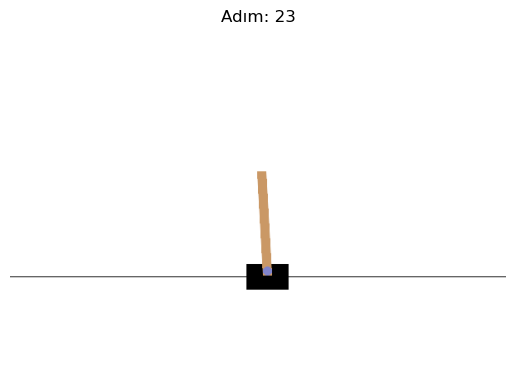

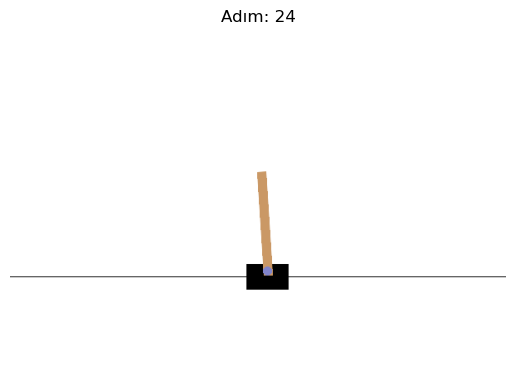

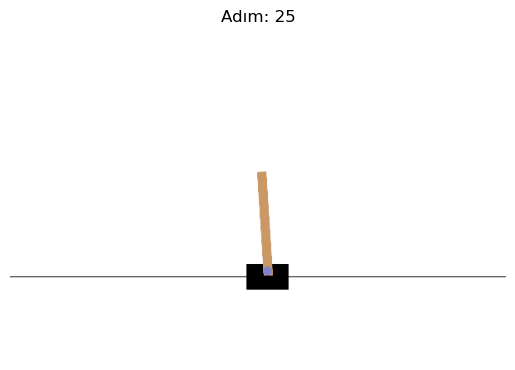

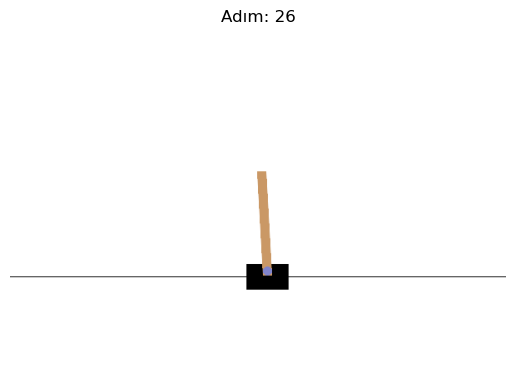

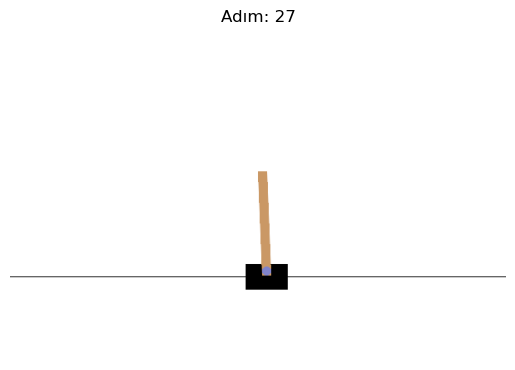

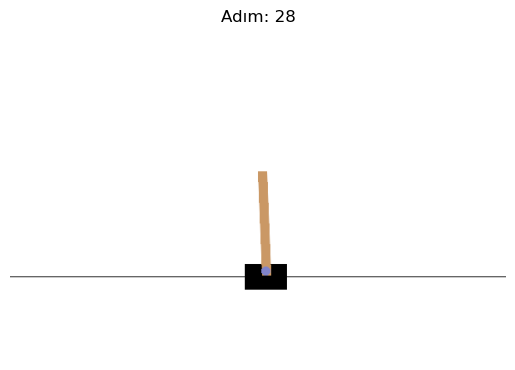

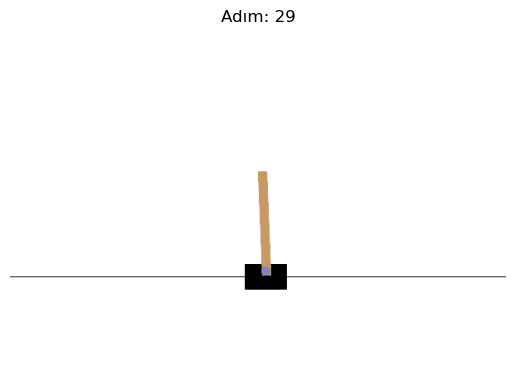

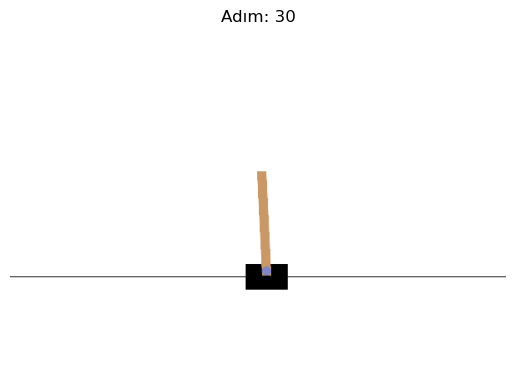

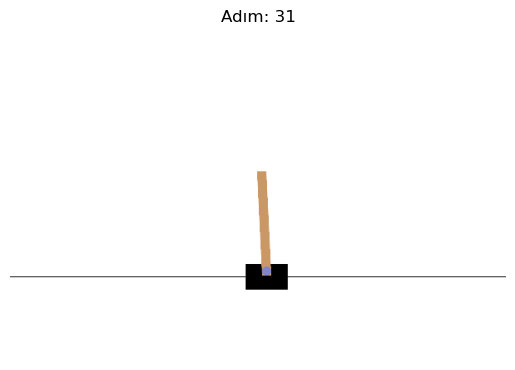

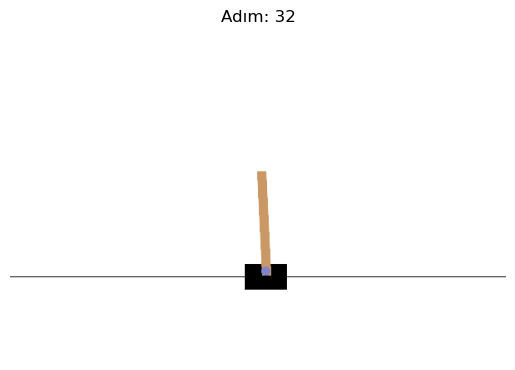

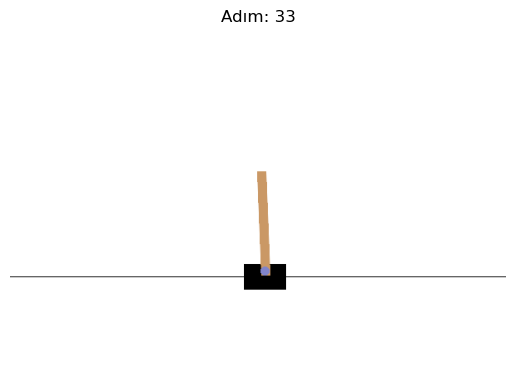

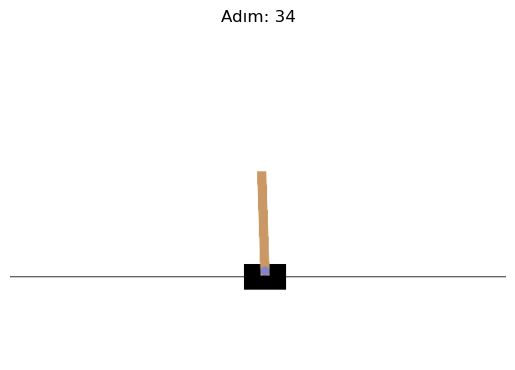

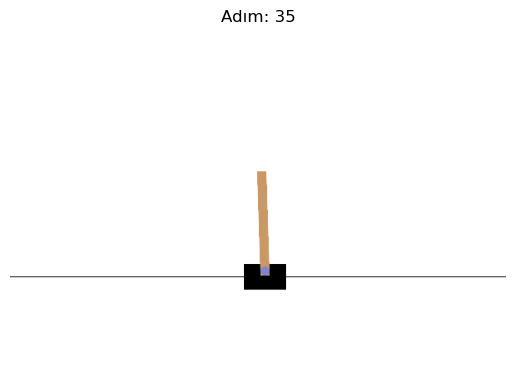

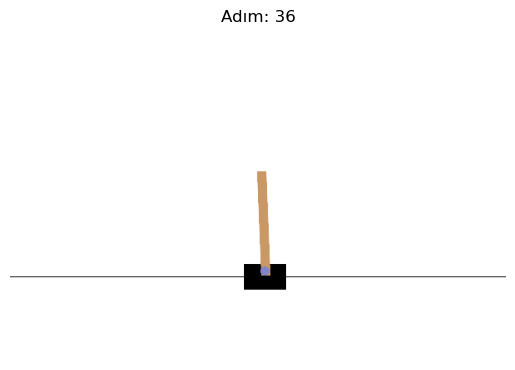

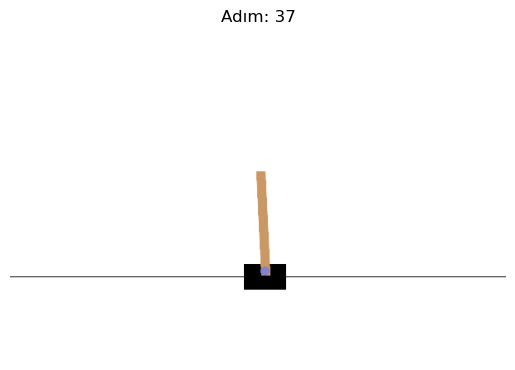

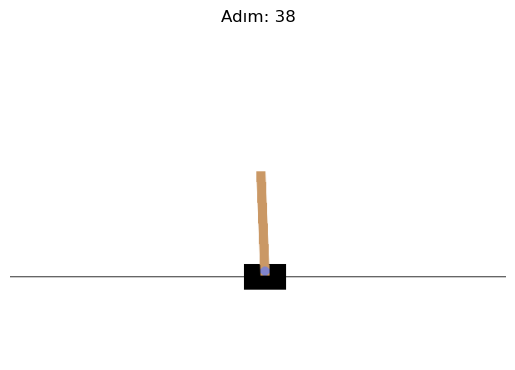

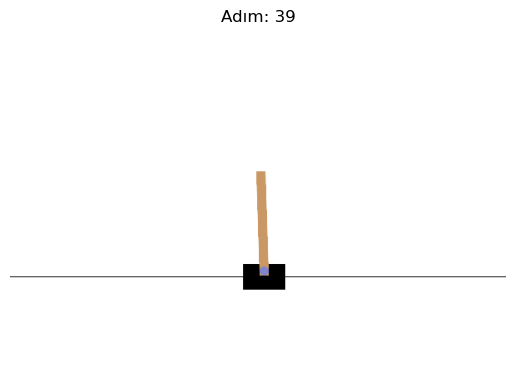

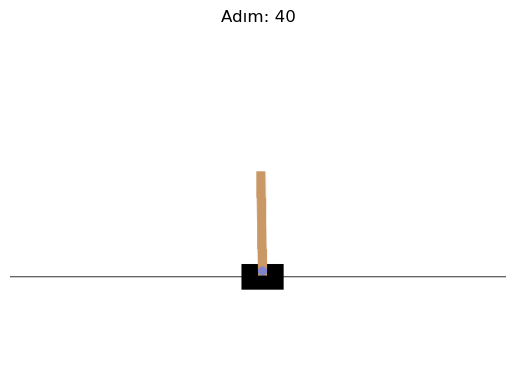

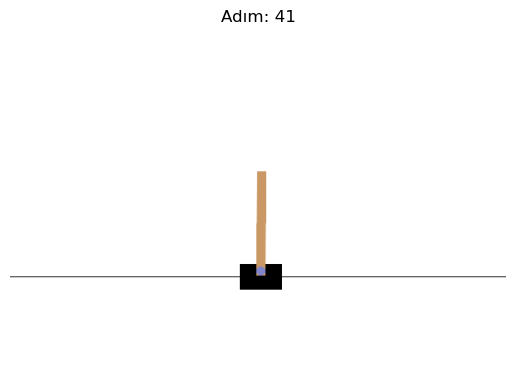

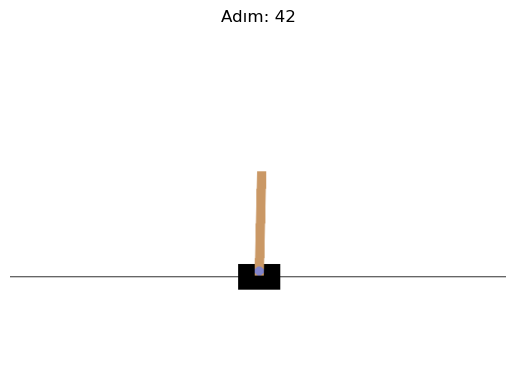

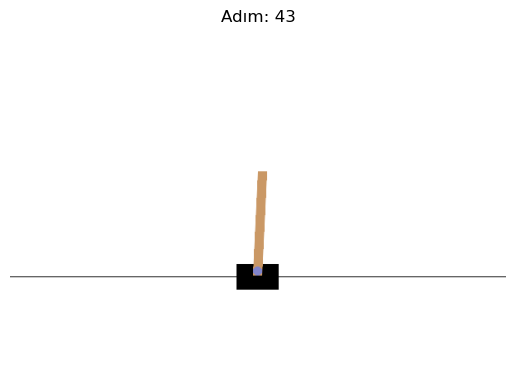

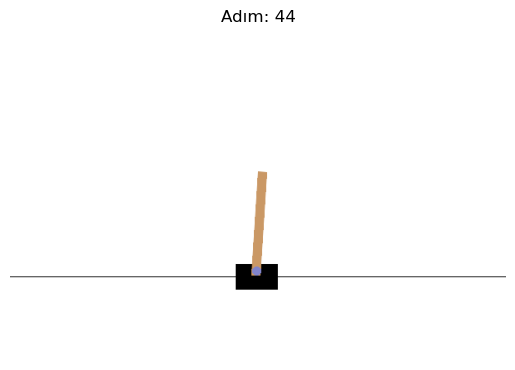

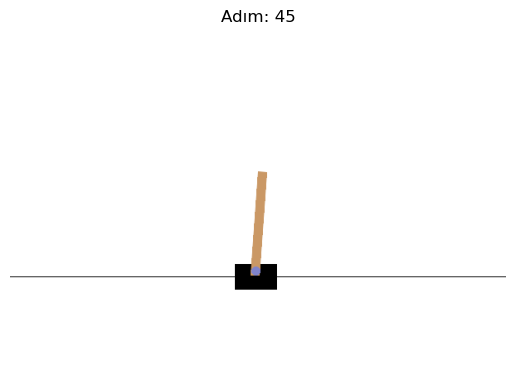

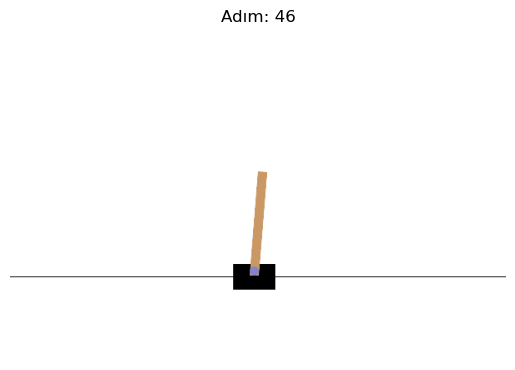

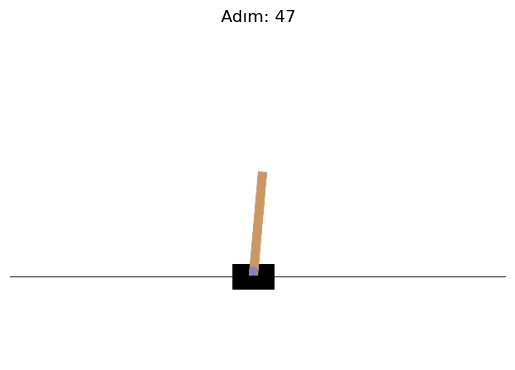

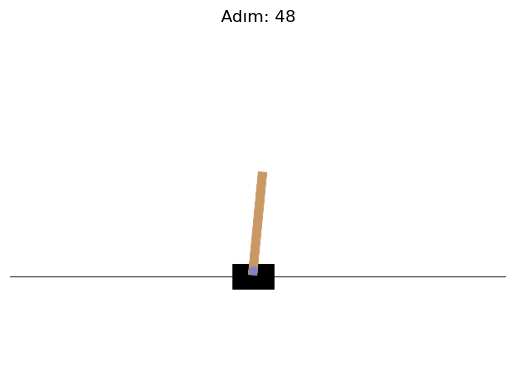

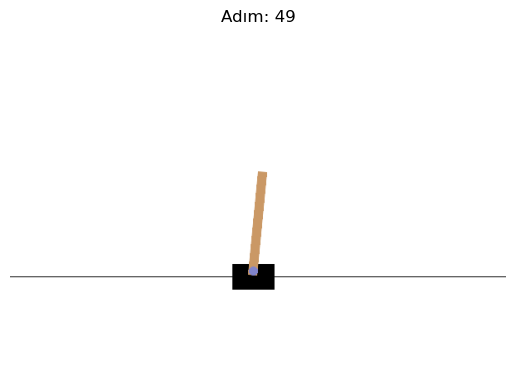

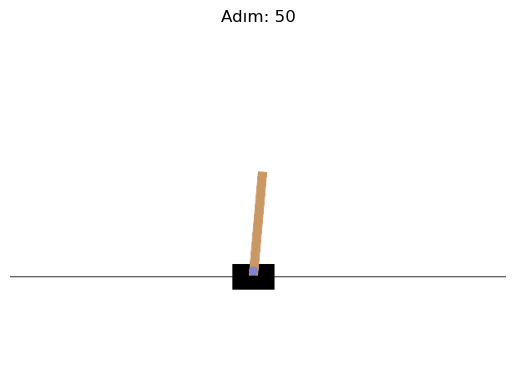

<Figure size 640x480 with 0 Axes>

: 

In [ ]:

import matplotlib.pyplot as plt  # Matplotlib kütüphanesini içe aktarır (grafik çizimleri için)
# Ortamı 100 adım boyunca çalıştırır (sonsuz döngü yerine)
for step in range(50):
    # observation bir tuple ise, ilk elemanı (gözlem) al
    obs = observation[0] if isinstance(observation, tuple) else observation
    # Modelden mevcut gözleme göre eylem tahmini alır
    action, _ = ppo_model.predict(obs)
    # Ortamda eylemi uygular, yeni gözlem, ödül, tamamlanma durumu ve bilgi alır
    observation, rewards, done, truncated, info = env.step(action)
   
    frames = env.render()
    # Ortamın render çıktısını alır (görüntü)
    # frames, ortamın render çıktısını (görüntü) içerir


    # Görüntüyü matplotlib ile gösterir
    plt.imshow(frames) 
    plt.axis('off')  # Eksenleri kapatır
    plt.title(f"Adım: {step+1}")
    # Başlık ekler
    plt.show(block=False)
    # Görüntüyü gösterir
    plt.pause(0.05)
    plt.clf()  # Bir sonraki kare için ekranı temizler
    # Eğer bölüm biterse ortamı sıfırlar
    if done or truncated:
        observation = env.reset()
    # Eğer observation bir tuple ise, ilk elemanı (gözlem) al
        observation = observation[0] if isinstance(observation, tuple) else observation
        
env.close()  # Ortamı kapatır
    